In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
  
data = pd.read_csv('supermarketSales.csv')

print(data.shape)
print(data.dtypes)

data.head()

(1000, 17)
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Section 1: Data Understanding & Cleaning


### Objective: Analyze historical data of the sales of a supermarket with different branches.
### Source: [Super Market Sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)
### Variables/Features:

| Variable/Feature | Type | Data Type |
| ----------- | ----------- | ----------- |
| Invoice ID | Object | Numerical |
| Branch | Object | Categorical |
| City | Object | Categorical |
| Customer Type | Object | Categorical |
| Gender | Object | Categorical |
| Product Line | Object | Categorical |
| Unit Price | Float | Numerical | 
| Quantity | Integer | Numerical |
| Tax 5% | Float | Numerical |
| Total | Float | Numerical |
| Date | Object | Numerical |
| Time | Object | Numerical | 
| Payment | Object | Categorical |
| COGS | Float | Numerical |
| Gross Margin Percentage | Float | Numerical |
| Gross Income | Float | Numerical |
| Rating | Float | Numerical |

In [3]:
print(data.isnull().sum())

# Find duplicate invoice ID's
duplicate_rows = data[data.duplicated()]
print(duplicate_rows.shape)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
(0, 17)


### Missing Values?

No missing values and no duplicate rows as shown above

# Section 2: Univariate Analysis (Understanding Each Variable)

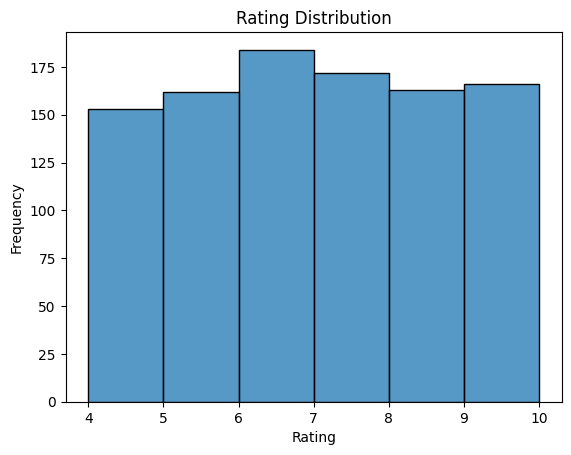

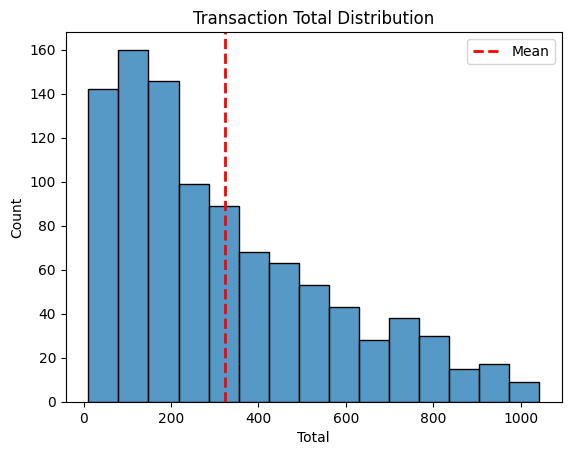

In [4]:


sns.histplot(data = data, x = 'Rating', bins = 6)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

avgTotal = data['Total'].mean()
sns.histplot(data['Total'])
plt.title('Transaction Total Distribution')
plt.axvline(avgTotal, color='red', linestyle='dashed', linewidth=2)
plt.legend({'Mean':avgTotal})
plt.show()


We can see a nearly uniform distribution of Ratings from 4 to 10 but with a slight increase of frequency in the 6-8 rangeOn a more interesting note, we see that the distribution of transaction totals seems to follow a Gamma distribution since it has a high frequency far on the left of the distribution and it quickly drops off after that forming a long right tail.

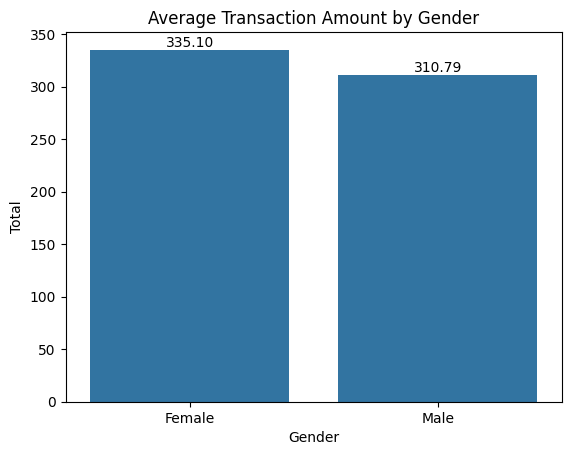

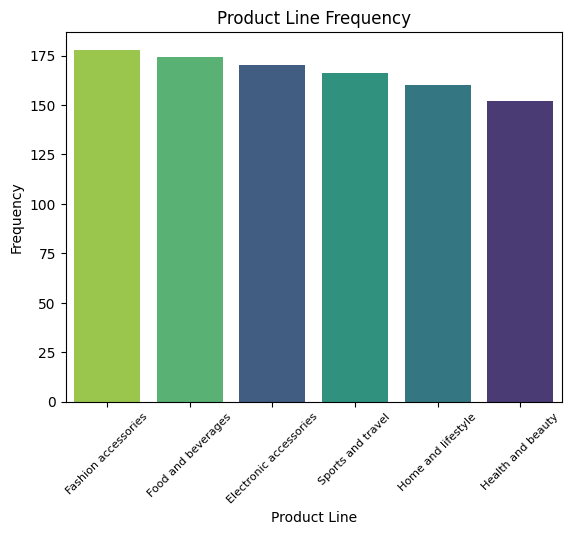

In [5]:
bplot = sns.barplot(data = data, x = 'Gender', y = 'Total', errorbar = None)
# Print the average transaction amount for each gender in each bar
bplot.bar_label(bplot.containers[0], fmt='%.2f')


plt.title('Average Transaction Amount by Gender')
plt.show()

sns.countplot(data = data, x = 'Product line', order = data['Product line'].value_counts().index, palette = 'viridis', hue = 'Product line', legend = False)
plt.title('Product Line Frequency')
plt.xticks(rotation = 45, fontsize=8, fontweight='light')
plt.xlabel('Product Line')
plt.ylabel('Frequency')
plt.show()


From the data above, we notice that on average, women tend to spend around $25 more than men. The insight we can derive from this is that women tend to spend more money than men. 

Next, we see in the second plot that fashion accessories as a product line is the most commonly purchased type of product yet there isn't a significant discrepency between the product lines.

# Section 3: Bivariate & Multivariate Analysis (Understanding Relationships)

Use correlation heatmaps for numerical variables.

Compare categorical vs. numerical data (boxplots, violin plots, swarm plots).

Explore relationships through scatter plots, pair plots, and grouped bar charts.

Check for potential feature interactions and trends.

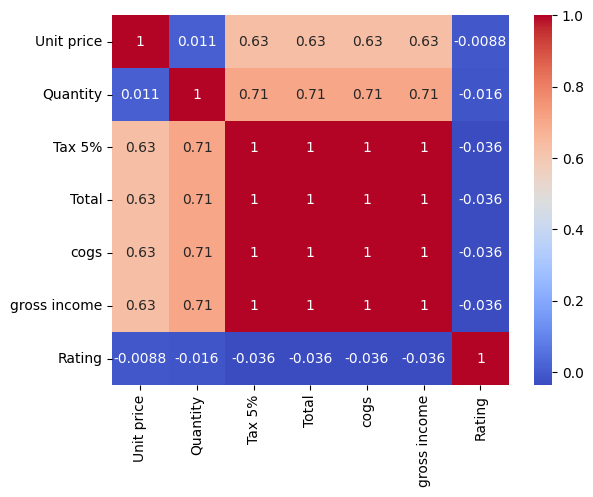

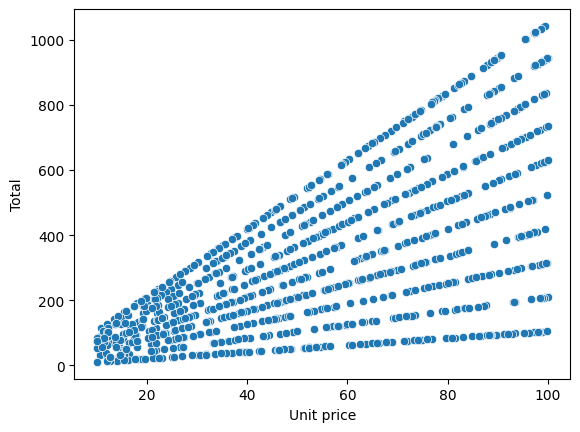

In [12]:
# Visualize numerical data

heatMapData = data.select_dtypes(include=[np.number])
heatMapData = heatMapData.drop(['gross margin percentage'], axis=1)

sns.heatmap(heatMapData.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.scatterplot(data = data, x = 'Unit price', y = 'Total')
plt.show()

The heatmap unfortunately does not give us much insight since obviously these numerical features are highly correlated and are derived from each other (tax 5% is derived from total, which is derived from unit price, which is derived by COGS, etc). 